In [1]:
## import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
## 指定讀取路徑
path_train_img = 'D:/AI CUP/Train_Dev/training/'
path_train_csv = 'D:/AI CUP/Train_Dev/train_labels/'
path_test_img  = 'D:/AI CUP/test_public/'

In [3]:
## 載入 train image & lable
train_name, train_image, train_label, haralick_y = [], [], [], []
for i,e in enumerate(os.listdir(path_train_img)):
    name = e.split(".")[0]
    train_name.append(name)
    
    if name.startswith('DS'): 
        haralick_y.append(1) ## 後期稻田標記為 1
    else:
        haralick_y.append(0) ## 初期稻田標記為 0

    img = cv2.imread(path_train_img+name+'.JPG') ## 載入圖片
    train_image.append(img) 
    csv = pd.read_csv(path_train_csv+name+'.csv', header=None, names=['x', 'y'])
    train_label.append(csv) 

## 載入 test image
test_name, test_image = [], []
for i,e in enumerate(os.listdir(path_test_img)):
    name = e.split(".")[0]
    test_name.append(name)
    img = cv2.imread(path_test_img+name+'.JPG') ## 載入圖片
    test_image.append(img)  

### 第一步使用 haralick 擷取圖片特徵，並利用 Random Forest 區分圖片為 : 初期稻田(0) or 後期稻田(1)

In [4]:
## 載入 train image & lable
train_name, train_image, train_label, haralick_y = [], [], [], []
for i,e in enumerate(os.listdir(path_train_img)):
    name = e.split(".")[0]
    train_name.append(name)
    
    if name.startswith('DS'): 
        haralick_y.append(1) ## 後期稻田標記為 1
    else:
        haralick_y.append(0) ## 初期稻田標記為 0

    img = cv2.imread(path_train_img+name+'.JPG') ## 載入圖片
    train_image.append(img) 
    csv = pd.read_csv(path_train_csv+name+'.csv', header=None, names=['x', 'y'])
    train_label.append(csv) 

## 載入 test image
test_name, test_image = [], []
for i,e in enumerate(os.listdir(path_test_img)):
    name = e.split(".")[0]
    test_name.append(name)
    img = cv2.imread(path_test_img+name+'.JPG') ## 載入圖片
    test_image.append(img)  

In [5]:
## haralick 的特徵擷取，不做平均減量，return 一維的特徵值向量
import mahotas as mt
def haralick(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert the image to grayscale
    feature = mt.features.haralick(gray)          # extract haralick texture from the image
    feature = feature.reshape(1, -1)[0]           # reshape (4*13) to 1-d array with 52 elemnts
    return feature

In [6]:
## 對 train image 擷取 haralick 特徵 
haralick_x = []
for img in train_image:
    haralick_x.append(haralick(img))  

## 修正 list -> array
haralick_x = np.array(haralick_x)
haralick_y = np.array(haralick_y)

In [7]:
## 建置 Random Forest 模型
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def Random_Forest_for_accuracy(x, y, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
    clf = RandomForestClassifier(n_estimators=n, random_state=5)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy Score')

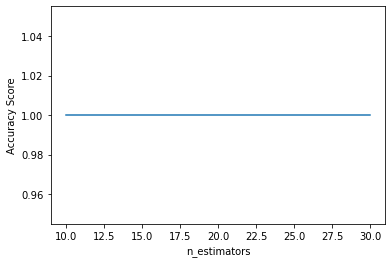

In [8]:
## 測試 Random Forest 模型的 樹木的數量 & 正確率 -> 返回 1.0  Great :))
f = []
for i in range(10,31):
    f.append(Random_Forest_for_accuracy(x=haralick_x, y=haralick_y, n=i))
plt.plot(range(10,31), f)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy Score')

In [9]:
## 對 test image 擷取 haralick 特徵 
haralick_test = []
for img in test_image:
    haralick_test.append(haralick(img))  

## 修正 list -> array
haralick_test = np.array(haralick_test)

In [10]:
## 正式 Random Forest 模型
rm_clf = RandomForestClassifier(n_estimators=10, random_state=5)
rm_clf.fit(haralick_x, haralick_y)

## 將測試集 haralick 特徵套用模型預測
rm_pred = rm_clf.predict(haralick_test)

In [11]:
sum(rm_pred)

25

### 使用 CNN 進行子圖的植株數量預測

In [354]:
## CNN 對 後期稻田的預測結果
subplot_for_later = pd.read_csv('C:/Users/Rou_yi/OneDrive/rice detector/0621 report/48_crops_CNN_test.csv')
## CNN 對 初期稻田的預測結果
subplot_for_early_c = pd.read_csv('C:/Users/Rou_yi/OneDrive/rice detector/0621 report/21_close_crops_CNN_test.csv')
subplot_for_early_f = pd.read_csv('C:/Users/Rou_yi/OneDrive/rice detector/0621 report/21_far_crops_CNN_test.csv')

In [355]:
subplot_for_early_c.head(2)

Unnamed: 0          position  IMG_170406_040351_0238_RGB1  \
0           0    [0, 72, 0, 72]                            0   
1           1  [0, 72, 72, 144]                            0   

   IMG_170406_040354_0240_RGB2  IMG_170406_040355_0241_RGB1  \
0                            1                            1   
1                            0                            1   

   IMG_170406_040356_0242_RGB1  IMG_170406_040356_0242_RGB4  \
0                            0                            0   
1                            0                            0   

   IMG_170406_040400_0245_RGB1  IMG_170406_040400_0245_RGB3  \
0                            0                            0   
1                            1                            0   

   IMG_170406_040400_0245_RGB4  IMG_170406_040406_0250_RGB2  \
0                            1                            0   
1                            1                            1   

   IMG_170406_040406_0250_RGB4  IMG_170406_040408_0252_RGB1  \
0                            0                            0   
1                            0                            0   

   IMG_170406_040408_0252_RGB4  IMG_170406_040409_0253_RGB4  \
0                            0                            0   
1                            0                            0   

   IMG_170406_040411_0254_RGB3  
0                            0  
1                            1

In [356]:
subplot_for_early_f.head(2)

Unnamed: 0         position  IMG_170406_035957_0043_RGB2  \
0           0   [0, 48, 0, 48]                            0   
1           1  [0, 48, 48, 96]                            0   

   IMG_170406_040021_0063_RGB2  IMG_170406_040041_0079_RGB3  \
0                            0                            0   
1                            0                            0   

   IMG_170406_040105_0099_RGB1  IMG_170406_040108_0102_RGB1  \
0                            0                            0   
1                            0                            0   

   IMG_170406_040124_0115_RGB1  IMG_170406_040157_0143_RGB3  \
0                            1                            1   
1                            1                            1   

   IMG_170406_040301_0196_RGB1  
0                            0  
1                            0

In [300]:
subplot_img = []
name = 'DSC082781'
pred_num = subplot_for_later[name]

for i,e in enumerate(test_name[:25]):
    if e == name: ## 分隔用
        img = test_image[i]
        for j in subplot_for_later['position']:
            range_ = j.replace('[','').replace(']','').split(", ")
            range_ = [int(x) for x in range_]
            s = img[range_[0]:range_[1], range_[2]:range_[3]]
            subplot_img.append(s)
            
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(subplot_img[i+5])
    ax[i].title.set_text('pred_num='+str(pred_num[i]))

## CNN 結果合併 K-means

### 取平均當作標記點

(-0.5, 99.5, 99.5, -0.5)

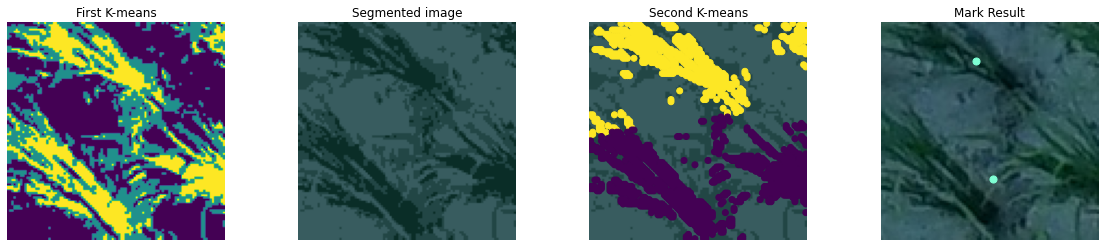

In [296]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
i = 8
sample = subplot_img[i]
pixel_vals = sample.reshape((-1,3)) 

# 第一次 k-means 尋找植株位置
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
retval, labels, centers = cv2.kmeans(pixel_vals, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
ax[0].imshow(labels.reshape(sample.shape[0], sample.shape[1]))
ax[0].title.set_text('First K-means')
ax[0].axis('off')

# 轉換植株色彩
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((sample.shape[0], sample.shape[1], 3))
ax[1].imshow(segmented_image)
ax[1].title.set_text('Segmented image')
ax[1].axis('off')

# 第二次 k-means 區分單顆植株
rule1 = segmented_image[:,:,0] < (min(segmented_image[:,:,0].flatten())+1)
rule2 = segmented_image[:,:,1] < (min(segmented_image[:,:,1].flatten())+1)
rule3 = segmented_image[:,:,2] < (min(segmented_image[:,:,2].flatten())+1)
chose = np.where(rule1 & rule2 & rule3)
df = pd.DataFrame({'y': chose[0], 'x': chose[1]})

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=pred_num[i], random_state=50).fit(df)
label_k = kmeans.labels_
ax[2].imshow(segmented_image)
ax[2].scatter(df['x'], df['y'], c=label_k)
ax[2].title.set_text('Second K-means')
ax[2].axis('off')

ans = []
for k in range(pred_num[i]):
    point = df[label_k == k].mean()
    ans.append( [point['x'], point['y']] )

p = pd.DataFrame(ans)
ax[3].imshow(sample)
ax[3].scatter(p[0], p[1], c='aquamarine', s=50)
ax[3].title.set_text('Mark Result')
ax[3].axis('off')

### 找顏色最深的地方當作標記點

(-0.5, 99.5, 99.5, -0.5)

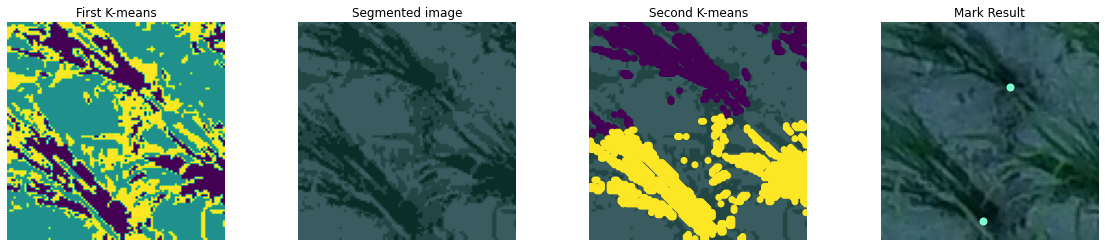

In [302]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
i = 8
sample = subplot_img[i]
pixel_vals = sample.reshape((-1,3)) 

# 第一次 k-means 尋找植株位置
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
retval, labels, centers = cv2.kmeans(pixel_vals, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
ax[0].imshow(labels.reshape(sample.shape[0], sample.shape[1]))
ax[0].title.set_text('First K-means')
ax[0].axis('off')

# 轉換植株色彩
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((sample.shape[0], sample.shape[1], 3))
ax[1].imshow(segmented_image)
ax[1].title.set_text('Segmented image')
ax[1].axis('off')

# 第二次 k-means 區分單顆植株
rule1 = segmented_image[:,:,0] < (min(segmented_image[:,:,0].flatten())+10)
rule2 = segmented_image[:,:,1] < (min(segmented_image[:,:,1].flatten())+10)
rule3 = segmented_image[:,:,2] < (min(segmented_image[:,:,2].flatten())+10)
chose = np.where(rule1 & rule2 & rule3)
df = pd.DataFrame({'y': chose[0], 'x': chose[1]})

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=pred_num[i], random_state=50).fit(df)
label_k = kmeans.labels_
ax[2].imshow(segmented_image)
ax[2].scatter(df['x'], df['y'], c=label_k)
ax[2].title.set_text('Second K-means')
ax[2].axis('off')

ans = []
for k in range(pred_num[i]):
    c = df[label_k == k].reset_index(drop=True)
    point = sample[c['y'], c['x'], :]
    rule1 = point[:,0] < min(point[:,0])+3
    rule2 = point[:,1] < min(point[:,1])+3
    rule3 = point[:,2] < min(point[:,2])+3
    chose = np.where(rule1 & rule2 & rule3)[0]
    x = np.mean(c['x'][chose])
    y = np.mean(c['y'][chose])
    ans.append( [x, y] )

p = pd.DataFrame(ans)
ax[3].imshow(sample)
ax[3].scatter(p[0], p[1], c='aquamarine', s=50)
ax[3].title.set_text('Mark Result')
ax[3].axis('off')

### 完整流程 1-1 / 測試集的 6 張後期稻田 / 使用平均位置抓點

In [303]:
result_point = {}
for i,name in enumerate(test_name[:6]): ##25
    print('{}. Processing image : {}'.format(i+1, name))
    pred_num = subplot_for_later[name]
    img = cv2.imread(path_test_img+name+'.JPG')

    ## 針對單張子圖進行分類
    points = []
    for j, pos in enumerate(subplot_for_later['position']):
        
        if pred_num[j] == 0:   ##子圖沒有植株時跳過找點步驟
            continue
        
        else:
            range_ = pos.replace('[','').replace(']','').split(", ")
            range_ = [int(x) for x in range_]
            subplot_img = img[range_[0]:range_[1], range_[2]:range_[3]]
            pixel_vals  = subplot_img.reshape((-1,3)) 

            # 第一次 k-means 尋找植株位置
            pixel_vals = np.float32(pixel_vals) # Convert to float type only for supporting cv2.kmean
            criteria   = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
            retval, labels, centers = cv2.kmeans(pixel_vals, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

            # 轉換植株色彩
            centers = np.uint8(centers)
            segmented_data  = centers[labels.flatten()]
            segmented_image = segmented_data.reshape(subplot_img.shape) # reshape data into the original image dimensions

            # 第二次 k-means 區分單顆植株
            rule1 = segmented_image[:,:,0] < (min(segmented_image[:,:,0].flatten())+1)
            rule2 = segmented_image[:,:,1] < (min(segmented_image[:,:,1].flatten())+1)
            rule3 = segmented_image[:,:,2] < (min(segmented_image[:,:,2].flatten())+1)
            chose = np.where(rule1 & rule2 & rule3)
            df    = pd.DataFrame({'x': chose[1], 'y': chose[0]})

            if pred_num[j] == 1:  ##子圖只有一顆植株時直接找點
                point = df.mean()
                points.append( [point['x']+range_[2], point['y']+range_[0]] )

            else: ##子圖超過一顆植株時進行分類
                kmeans  = KMeans(n_clusters=pred_num[j], random_state=50).fit(df)
                label_k = kmeans.labels_
                for k in range(pred_num[j]):
                    point = df[label_k == k].mean()
                    points.append( [point['x']+range_[2], point['y']+range_[0]] )

    ## 將這張子圖的所有結果存起來
    result_point.update({name:points})
    print('   Find {} points in image {}.'.format(len(points),name))

1. Processing image : DSC080633
   Find 867 points in image DSC080633.
2. Processing image : DSC080733
   Find 865 points in image DSC080733.
3. Processing image : DSC080823
   Find 579 points in image DSC080823.
4. Processing image : DSC080994
   Find 916 points in image DSC080994.
5. Processing image : DSC081024
   Find 790 points in image DSC081024.
6. Processing image : DSC081034
   Find 904 points in image DSC081034.


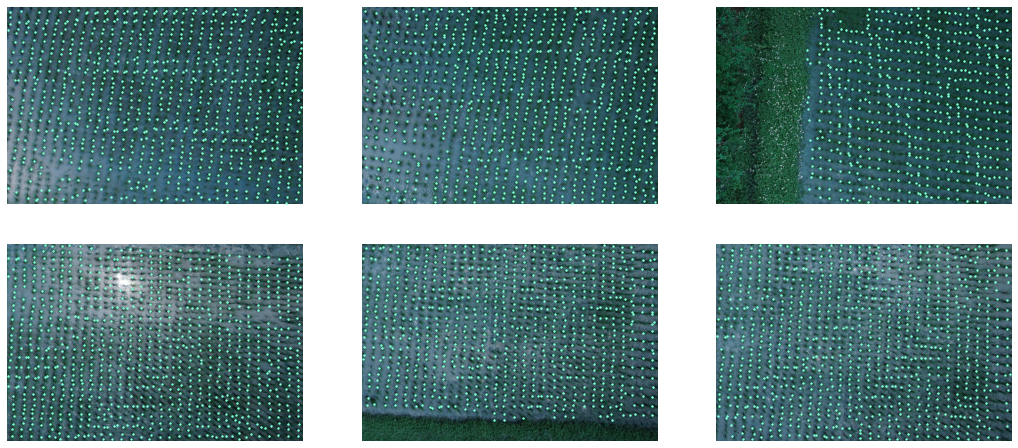

In [309]:
f, ax = plt.subplots(2, 3, figsize = (18, 8))
for i,name in enumerate(test_name[:6]):
    p = pd.DataFrame(result_point[name])
    ax[i//3][i%3].imshow(test_image[i])
    ax[i//3][i%3].scatter(p[0], p[1], c='aquamarine', s=2)
    ax[i//3][i%3].axis('off')

### 完整流程 1-2 / 測試集的 6 張後期稻田 / 抓點在顏色最深的地方

In [310]:
result_point = {}
for i,name in enumerate(test_name[:6]): ##25
    print('{}. Processing image : {}'.format(i+1, name))
    pred_num = subplot_for_later[name]
    img = cv2.imread(path_test_img+name+'.JPG')

    ## 針對單張子圖進行分類
    points = []
    for j, pos in enumerate(subplot_for_later['position']):
        
        if pred_num[j] == 0:   ##子圖沒有植株時跳過找點步驟
            continue
        
        else:
            range_ = pos.replace('[','').replace(']','').split(", ")
            range_ = [int(x) for x in range_]
            subplot_img = img[range_[0]:range_[1], range_[2]:range_[3]]
            pixel_vals  = subplot_img.reshape((-1,3)) 

            # 第一次 k-means 尋找植株位置
            pixel_vals = np.float32(pixel_vals) # Convert to float type only for supporting cv2.kmean
            criteria   = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
            retval, labels, centers = cv2.kmeans(pixel_vals, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

            # 轉換植株色彩
            centers = np.uint8(centers)
            segmented_data  = centers[labels.flatten()]
            segmented_image = segmented_data.reshape(subplot_img.shape) # reshape data into the original image dimensions

            # 第二次 k-means 區分單顆植株
            rule1 = segmented_image[:,:,0] == min(segmented_image[:,:,0].flatten())
            rule2 = segmented_image[:,:,1] == min(segmented_image[:,:,1].flatten())
            rule3 = segmented_image[:,:,2] == min(segmented_image[:,:,2].flatten())
            chose = np.where(rule1 & rule2 & rule3)
            df    = pd.DataFrame({'x': chose[1], 'y': chose[0]})

            if pred_num[j] == 1:  ##子圖只有一顆植株時直接找點
                c = df.reset_index(drop=True)
                point = sample[c['y'], c['x'], :]
                rule1 = point[:,0] < min(point[:,0])+3
                rule2 = point[:,1] < min(point[:,1])+3
                rule3 = point[:,2] < min(point[:,2])+3
                chose = np.where(rule1 & rule2 & rule3)[0]
                x = np.mean(c['x'][chose])+range_[2]
                y = np.mean(c['y'][chose])+range_[0]
                if (np.isnan(x) == False) & (np.isnan(y) == False):
                    points.append( [x, y] )
                    
            else: ##子圖超過一顆植株時進行分類
                kmeans  = KMeans(n_clusters=pred_num[j], random_state=50).fit(df)
                label_k = kmeans.labels_
                for k in range(pred_num[j]):
                    c = df[label_k == k].reset_index(drop=True)
                    point = sample[c['y'], c['x'], :]
                    rule1 = point[:,0] < min(point[:,0])+3
                    rule2 = point[:,1] < min(point[:,1])+3
                    rule3 = point[:,2] < min(point[:,2])+3
                    chose = np.where(rule1 & rule2 & rule3)[0]
                    x = np.mean(c['x'][chose])+range_[2]
                    y = np.mean(c['y'][chose])+range_[0]
                    if (np.isnan(x) == False) & (np.isnan(y) == False):
                        points.append( [x, y] )
    ## 將這張子圖的所有結果存起來
    result_point.update({name:points})
    print('   Find {} points in image {}.'.format(len(points),name))

1. Processing image : DSC080633
   Find 670 points in image DSC080633.
2. Processing image : DSC080733
   Find 659 points in image DSC080733.
3. Processing image : DSC080823
   Find 433 points in image DSC080823.
4. Processing image : DSC080994
   Find 689 points in image DSC080994.
5. Processing image : DSC081024
   Find 577 points in image DSC081024.
6. Processing image : DSC081034
   Find 673 points in image DSC081034.


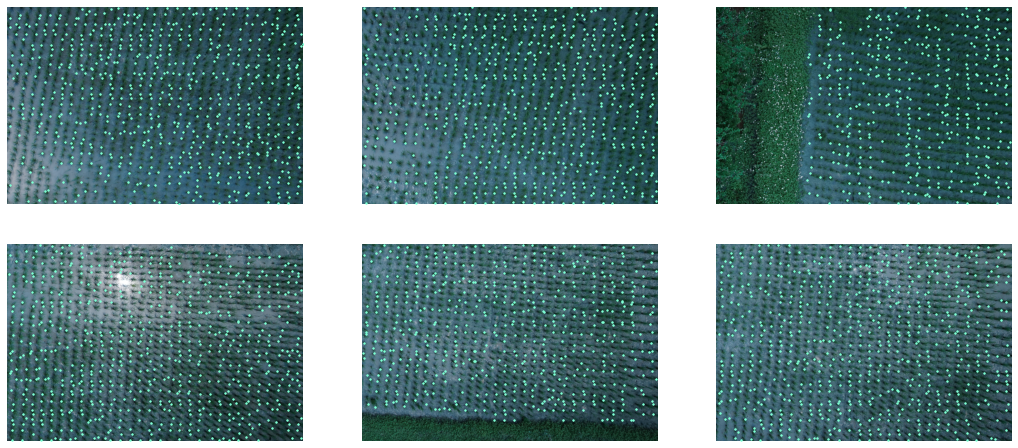

In [311]:
f, ax = plt.subplots(2, 3, figsize = (18, 8))
for i,name in enumerate(test_name[:6]):
    p = pd.DataFrame(result_point[name])
    ax[i//3][i%3].imshow(test_image[i])
    ax[i//3][i%3].scatter(p[0], p[1], c='aquamarine', s=2)
    ax[i//3][i%3].axis('off')

### 完整流程 2-1 / 測試集的 6 張初期稻田 / 使用平均位置抓點

In [381]:
def average_point(cnn_pred_result):
    result_point = {}
    file_name = cnn_pred_result.columns[2:]
    for i,name in enumerate(file_name[:6]):
        print('{}. Processing image : {}'.format(i+1, name))
        pred_num = cnn_pred_result[name]
        img = cv2.imread(path_test_img+name+'.JPG') ## 載入圖片

        ## 針對單張子圖進行分類
        points = []
        for j, pos in enumerate(cnn_pred_result['position']):
            if pred_num[j] == 0:   ##子圖沒有植株時跳過找點步驟
                continue
            else:
                range_ = pos.replace('[','').replace(']','').split(", ")
                range_ = [int(x) for x in range_]
                subplot_img = img[range_[0]:range_[1], range_[2]:range_[3]]
                pixel_vals  = subplot_img.reshape((-1,3)) 

                # 第一次 k-means 尋找植株位置
                pixel_vals = np.float32(pixel_vals) # Convert to float type only for supporting cv2.kmean
                criteria   = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
                retval, labels, centers = cv2.kmeans(pixel_vals, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

                # 轉換植株色彩
                centers = np.uint8(centers)
                segmented_data  = centers[labels.flatten()]
                segmented_image = segmented_data.reshape(subplot_img.shape) # reshape data into the original image dimensions

                # 第二次 k-means 區分單顆植株
                rule1 = segmented_image[:,:,0] < (min(segmented_image[:,:,0].flatten())+1)
                rule2 = segmented_image[:,:,1] < (min(segmented_image[:,:,1].flatten())+1)
                rule3 = segmented_image[:,:,2] < (min(segmented_image[:,:,2].flatten())+1)
                chose = np.where(rule1 & rule2 & rule3)
                df    = pd.DataFrame({'x': chose[1], 'y': chose[0]})

                if pred_num[j] == 1:  ##子圖只有一顆植株時直接找點
                    point = df.mean()
                    points.append( [point['x']+range_[2], point['y']+range_[0]] )

                else: ##子圖超過一顆植株時進行分類
                    try:
                        kmeans  = KMeans(n_clusters=pred_num[j], random_state=50).fit(df)
                        label_k = kmeans.labels_
                        for k in range(pred_num[j]):
                            point = df[label_k == k].mean()
                            points.append( [point['x']+range_[2], point['y']+range_[0]] )
                    except:
                        pass
        ## 將這張子圖的所有結果存起來
        result_point.update({name:points})
        print('   Find {} points in image {}.'.format(len(points),name))
    return result_point

ans_far   = average_point(subplot_for_early_f)
ans_close = average_point(subplot_for_early_c)

1. Processing image : IMG_170406_035957_0043_RGB2
   Find 311 points in image IMG_170406_035957_0043_RGB2.
2. Processing image : IMG_170406_040021_0063_RGB2
   Find 1754 points in image IMG_170406_040021_0063_RGB2.
3. Processing image : IMG_170406_040041_0079_RGB3
   Find 2229 points in image IMG_170406_040041_0079_RGB3.
4. Processing image : IMG_170406_040105_0099_RGB1
   Find 2001 points in image IMG_170406_040105_0099_RGB1.
5. Processing image : IMG_170406_040108_0102_RGB1
   Find 1361 points in image IMG_170406_040108_0102_RGB1.
6. Processing image : IMG_170406_040124_0115_RGB1
   Find 1575 points in image IMG_170406_040124_0115_RGB1.
1. Processing image : IMG_170406_040351_0238_RGB1
   Find 323 points in image IMG_170406_040351_0238_RGB1.
2. Processing image : IMG_170406_040354_0240_RGB2
   Find 270 points in image IMG_170406_040354_0240_RGB2.
3. Processing image : IMG_170406_040355_0241_RGB1
   Find 387 points in image IMG_170406_040355_0241_RGB1.
4. Processing image : IMG_170406

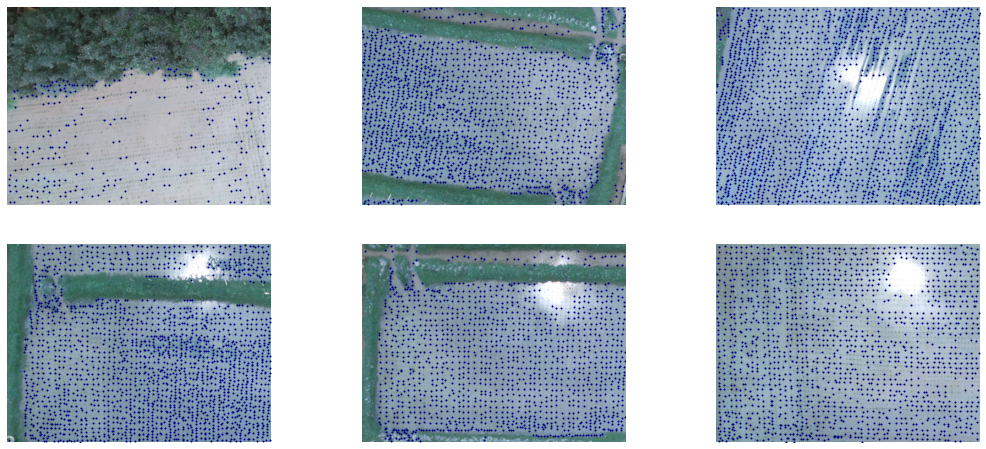

In [390]:
f, ax = plt.subplots(2, 3, figsize = (18, 8))
file_name = subplot_for_early_f.columns[2:]
for i,name in enumerate(file_name[:6]):
    p = pd.DataFrame(ans_far[name])
    ax[i//3][i%3].imshow(cv2.imread(path_test_img+name+'.JPG'))
    ax[i//3][i%3].scatter(p[0], p[1], c='navy', s=1)
    ax[i//3][i%3].axis('off')

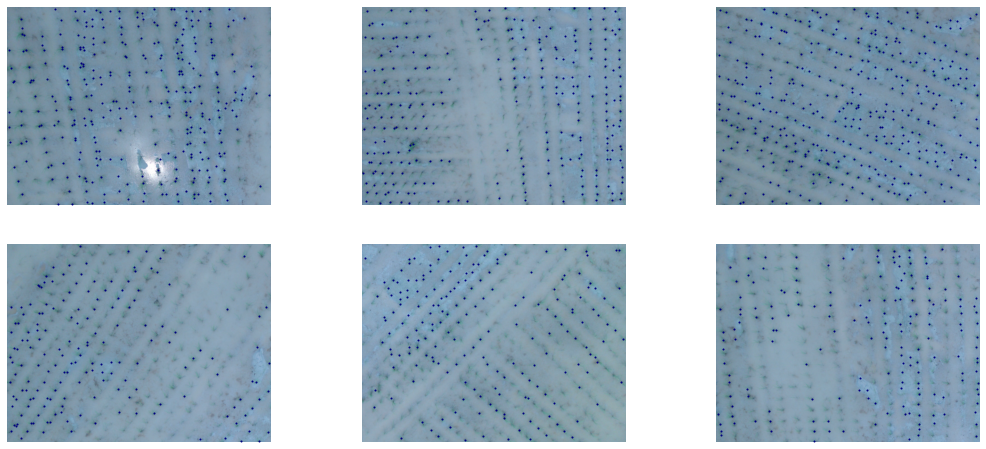

In [391]:
f, ax = plt.subplots(2, 3, figsize = (18, 8))
file_name = subplot_for_early_c.columns[2:]
for i,name in enumerate(file_name[:6]):
    p = pd.DataFrame(ans_close[name])
    ax[i//3][i%3].imshow(cv2.imread(path_test_img+name+'.JPG'))
    ax[i//3][i%3].scatter(p[0], p[1], c='navy', s=1)
    ax[i//3][i%3].axis('off')

### 完整流程 2-2 / 測試集的 6 張初期稻田 / 抓點在顏色最深的地方

In [402]:
def darkest_point(cnn_pred_result):
    result_point = {}
    file_name = cnn_pred_result.columns[2:]
    for i,name in enumerate(file_name[:6]):
        print('{}. Processing image : {}'.format(i+1, name))
        pred_num = cnn_pred_result[name]
        img = cv2.imread(path_test_img+name+'.JPG') ## 載入圖片
        
        ## 針對單張子圖進行分類
        points = []
        for j, pos in enumerate(cnn_pred_result['position']):

            if pred_num[j] == 0:   ##子圖沒有植株時跳過找點步驟
                continue

            else:
                range_ = pos.replace('[','').replace(']','').split(", ")
                range_ = [int(x) for x in range_]
                subplot_img = img[range_[0]:range_[1], range_[2]:range_[3]]
                pixel_vals  = subplot_img.reshape((-1,3)) 

                # 第一次 k-means 尋找植株位置
                pixel_vals = np.float32(pixel_vals) # Convert to float type only for supporting cv2.kmean
                criteria   = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
                retval, labels, centers = cv2.kmeans(pixel_vals, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

                # 轉換植株色彩
                centers = np.uint8(centers)
                segmented_data  = centers[labels.flatten()]
                segmented_image = segmented_data.reshape(subplot_img.shape) # reshape data into the original image dimensions

                # 第二次 k-means 區分單顆植株
                rule1 = segmented_image[:,:,0] == min(segmented_image[:,:,0].flatten())
                rule2 = segmented_image[:,:,1] == min(segmented_image[:,:,1].flatten())
                rule3 = segmented_image[:,:,2] == min(segmented_image[:,:,2].flatten())
                chose = np.where(rule1 & rule2 & rule3)
                df    = pd.DataFrame({'x': chose[1], 'y': chose[0]})

                if pred_num[j] == 1:  ##子圖只有一顆植株時直接找點
                    try:
                        c = df.reset_index(drop=True)
                        point = sample[c['y'], c['x'], :]
                        rule1 = point[:,0] < min(point[:,0])+3
                        rule2 = point[:,1] < min(point[:,1])+3
                        rule3 = point[:,2] < min(point[:,2])+3
                        chose = np.where(rule1 & rule2 & rule3)[0]
                        x = np.mean(c['x'][chose])+range_[2]
                        y = np.mean(c['y'][chose])+range_[0]
                        if (np.isnan(x) == False) & (np.isnan(y) == False):
                            points.append( [x, y] )
                    except:
                        pass
                else: ##子圖超過一顆植株時進行分類
                    try:
                        kmeans  = KMeans(n_clusters=pred_num[j], random_state=50).fit(df)
                        label_k = kmeans.labels_
                        for k in range(pred_num[j]):
                            c = df[label_k == k].reset_index(drop=True)
                            point = sample[c['y'], c['x'], :]
                            rule1 = point[:,0] < min(point[:,0])+3
                            rule2 = point[:,1] < min(point[:,1])+3
                            rule3 = point[:,2] < min(point[:,2])+3
                            chose = np.where(rule1 & rule2 & rule3)[0]
                            x = np.mean(c['x'][chose])+range_[2]
                            y = np.mean(c['y'][chose])+range_[0]
                            if (np.isnan(x) == False) & (np.isnan(y) == False):
                                points.append( [x, y] )
                    except:
                        pass
        ## 將這張子圖的所有結果存起來
        result_point.update({name:points})
        print('   Find {} points in image {}.'.format(len(points),name))
    return result_point

ans_far_2   = darkest_point(subplot_for_early_f)
ans_close_2 = darkest_point(subplot_for_early_c)

1. Processing image : IMG_170406_035957_0043_RGB2
   Find 254 points in image IMG_170406_035957_0043_RGB2.
2. Processing image : IMG_170406_040021_0063_RGB2
   Find 1457 points in image IMG_170406_040021_0063_RGB2.
3. Processing image : IMG_170406_040041_0079_RGB3
   Find 1867 points in image IMG_170406_040041_0079_RGB3.
4. Processing image : IMG_170406_040105_0099_RGB1
   Find 1706 points in image IMG_170406_040105_0099_RGB1.
5. Processing image : IMG_170406_040108_0102_RGB1
   Find 1150 points in image IMG_170406_040108_0102_RGB1.
6. Processing image : IMG_170406_040124_0115_RGB1
   Find 1359 points in image IMG_170406_040124_0115_RGB1.
1. Processing image : IMG_170406_040351_0238_RGB1
   Find 284 points in image IMG_170406_040351_0238_RGB1.
2. Processing image : IMG_170406_040354_0240_RGB2
   Find 233 points in image IMG_170406_040354_0240_RGB2.
3. Processing image : IMG_170406_040355_0241_RGB1
   Find 340 points in image IMG_170406_040355_0241_RGB1.
4. Processing image : IMG_170406

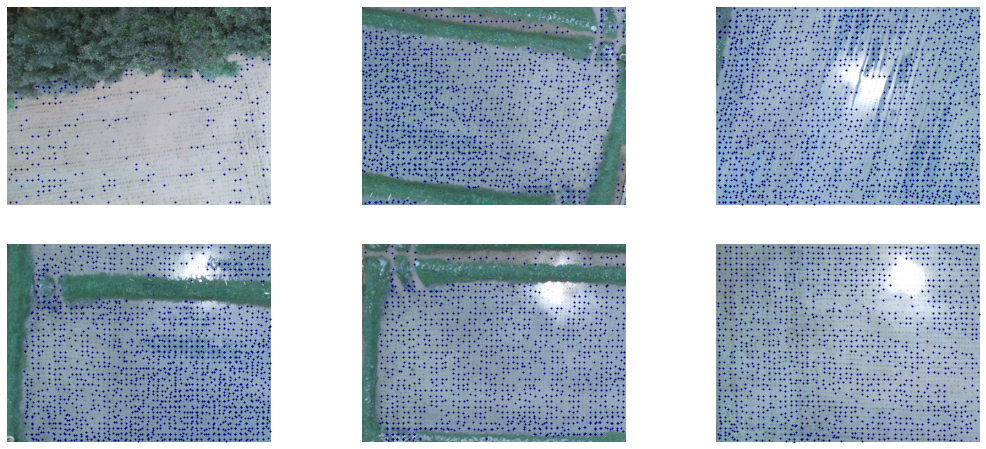

In [403]:
f, ax = plt.subplots(2, 3, figsize = (18, 8))
file_name = subplot_for_early_f.columns[2:]
for i,name in enumerate(file_name[:6]):
    p = pd.DataFrame(ans_far_2[name])
    ax[i//3][i%3].imshow(cv2.imread(path_test_img+name+'.JPG'))
    ax[i//3][i%3].scatter(p[0], p[1], c='navy', s=1)
    ax[i//3][i%3].axis('off')

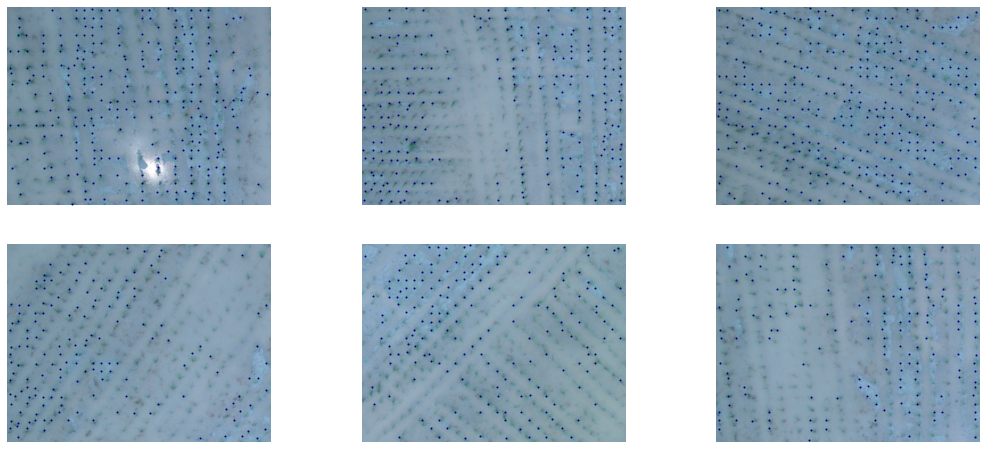

In [407]:
f, ax = plt.subplots(2, 3, figsize = (18, 8))
file_name = subplot_for_early_c.columns[2:]
for i,name in enumerate(file_name[:6]):
    p = pd.DataFrame(ans_close_2[name])
    ax[i//3][i%3].imshow(cv2.imread(path_test_img+name+'.JPG'))
    ax[i//3][i%3].scatter(p[0], p[1], c='navy', s=1)
    ax[i//3][i%3].axis('off')